In [12]:
# import serial
# import csv

# csv_filename = 'pressure_sensor_data_raw2';
# header = ['t','sensor0', 'sensor1']
# sensor0 = [0, 0];
# sensor1 = [0, 0];
# total_time = 60;
# sample_freq = 562500/(239.5+14.5); # ADCs sampling frequency / (selected number of cycles + ADCs delay in cycles)
# sample_time = 1/sample_freq;
# sample_amount = int(round(total_time/sample_time));

# # NOTE the user must ensure that the serial port and baudrate are correct
# serPort = "/dev/ttyACM0";
# baudRate = 115200;
# ser = serial.Serial(serPort, baudRate);
# print("Serial port " + serPort + " open:  Baudrate " + str(baudRate));

# with open(csv_filename+'.csv', 'w', encoding='UTF8', newline='') as pressure_sensor_data:
#     data_write = csv.writer(pressure_sensor_data)
    
#     # write the header
#     data_write.writerow(header)
    
#     #print(str((((int.from_bytes(sensor0[1], "little") << 8) + int.from_bytes(sensor0[0], "little")) >> 2)) + ', ' 
#     #      + str((((int.from_bytes(sensor1[1], "little") << 8) + int.from_bytes(sensor1[0], "little")) >> 2)) + ';');
#     for i in range(0, sample_amount):
#         sensor0[0] = ser.read();
#         sensor0[1] = ser.read();
#         sensor1[0] = ser.read();
#         sensor1[1] = ser.read();
        
#         # write the data
#         data_write.writerow([i*sample_time,
#                             str((((int.from_bytes(sensor0[1], "little") << 8) + int.from_bytes(sensor0[0], "little")) >> 2)),
#                             str((((int.from_bytes(sensor1[1], "little") << 8) + int.from_bytes(sensor1[0], "little")) >> 2))])
#     print('Finished writing to '+ csv_filename +'.csv');

<IPython.core.display.Javascript object>


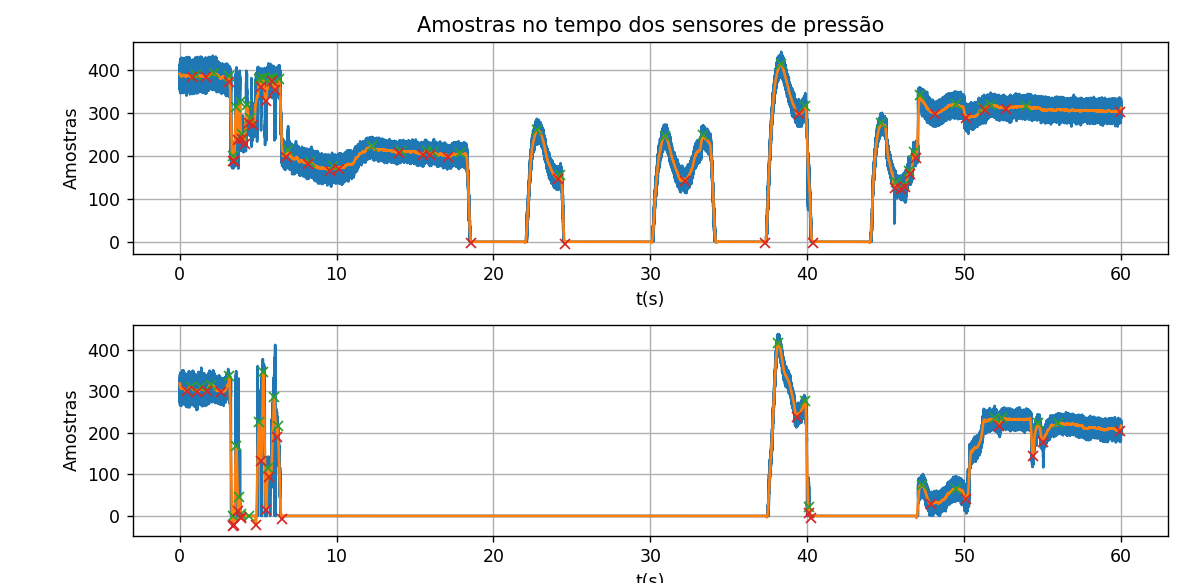

In [13]:
import csv
import copy
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks, savgol_filter

%matplotlib notebook

def fix_tol_val(sensor_data):
    fixed_data = copy.deepcopy(sensor_data);

    for i in range(1, len(fixed_data)-1):
        if abs(fixed_data[i]-fixed_data[i-1]) <= 4:
            fixed_data[i] = fixed_data[i-1];
            
    return fixed_data;
                                                   
csv_filename = 'pressure_sensor_data_raw2';
t = [];
sensor0_data = [];
sensor1_data = [];

with open(csv_filename+'.csv', 'r', encoding='UTF8', newline='') as pressure_sensor_data:
    data_read = csv.DictReader(pressure_sensor_data)

    headers = data_read.fieldnames;
    
    for col in data_read:
        t.append(float(col[headers[0]]));
        sensor0_data.append(int(col[headers[1]]));
        sensor1_data.append(int(col[headers[2]]));
        
sensor0_data_filt = savgol_filter(fix_tol_val(sensor0_data), 601, 2, mode='nearest');
#sensor0_data_filt = sensor0_data;
sensor1_data_filt = savgol_filter(fix_tol_val(sensor1_data), 601, 2, mode='nearest');

maxima0 = find_peaks(sensor0_data_filt, prominence=5)[0];
minima0 = find_peaks(-sensor0_data_filt, prominence=5)[0];

maxima1 = find_peaks(sensor1_data_filt,prominence=5)[0];
minima1 = find_peaks(-sensor1_data_filt, prominence=5)[0];

plt.figure();
plt.subplot(2,1,1);
plt.plot(t, sensor0_data, t, sensor0_data_filt);
plt.plot(np.asarray(t)[maxima0.astype(int)], sensor0_data_filt[maxima0.astype(int)], "x");
plt.plot(np.asarray(t)[minima0.astype(int)], sensor0_data_filt[minima0.astype(int)], "x");
plt.title('Amostras no tempo dos sensores de pressão');
plt.ylabel('Amostras');
plt.xlabel('t(s)');
plt.grid();

plt.subplot(2,1,2);
plt.plot(t, sensor1_data, t, sensor1_data_filt);
plt.plot(np.asarray(t)[maxima1.astype(int)], sensor1_data_filt[maxima1.astype(int)], "x");
plt.plot(np.asarray(t)[minima1.astype(int)], sensor1_data_filt[minima1.astype(int)], "x");
plt.grid();
plt.tight_layout();
plt.ylabel('Amostras');
plt.xlabel('t(s)');
plt.show();

In [14]:
def mean_time_delta(n2, n1, n4, n3):
    return abs((n2-n1+n4-n3)/2);

def leak_point(pipeline_length, time_delta, npw_speed=360.56, fluid_speed=1):
    # From upstream
    return (pipeline_length+time_delta*(npw_speed-fluid_speed))/2;
    
time0_max = np.asarray(t)[maxima0.astype(int)];
time0_min = np.asarray(t)[minima0.astype(int)];

time1_max = np.asarray(t)[maxima1.astype(int)];
time1_min = np.asarray(t)[minima1.astype(int)];

measured_length = 2.955;    

time_delta2510 = mean_time_delta(time0_max[2], time1_max[3], time0_min[3], time1_min[4]);
leak2510 = leak_point(measured_length, time_delta2510);

print("Vazamento no ponto de 2,51 m:")
print("Diferença de tempo média entre os dois sensores =", time_delta2510);
print("Distância do vazamento calculada =", leak2510);

time_delta975 = mean_time_delta(time0_max[27], time1_max[15], time0_min[28], time1_min[17]);
leak975 = leak_point(measured_length, time_delta975);

print("Vazamento no ponto de 0,975 m:")
print("Diferença de tempo média entre os dois sensores =", time_delta975);
print("Distância do vazamento calculada =", leak975);

Vazamento no ponto de 2,51 m:
Diferença de tempo média entre os dois sensores = 0.0051928888888888025
Distância do vazamento calculada = 2.411077564444429
Vazamento no ponto de 0,975 m:
Diferença de tempo média entre os dois sensores = 0.05621866666666975
Distância do vazamento calculada = 11.584491893333887


In [15]:
print(np.asarray(t)[maxima0.astype(int)])
print(np.asarray(t)[minima0.astype(int)])

[ 1.01735467  2.16927289  3.16721067  3.41556622  3.61018667  3.81835378
  4.00394311  4.29745422  4.51058844  5.07142044  5.32203378  5.66657067
  5.92260267  6.32493867  6.900672    8.31042844  9.77753244 12.23986489
 14.118336   15.73851733 16.16839822 17.87798756 22.80355556 24.27246578
 30.922976   33.35460267 38.30636089 39.85203556 44.71438578 45.67800533
 46.15259022 46.46687289 46.81682844 47.158656   49.46655644 51.20323911
 51.71169067 53.94056889]
[ 0.81099378  1.65630578  3.133344    3.38034489  3.4544      3.70862578
  3.95201422  4.13850667  4.44691911  4.706112    5.20417778  5.49497956
  5.88422044  6.08696889  6.78191289  8.17180089  9.59645867 10.13877689
 13.96164622 15.51590044 15.95481244 17.08912    18.59460622 24.11713067
 24.55604267 32.211264   37.31474489 39.48266311 40.33836089 45.58453333
 45.988224   46.25554489 46.57524622 46.94823111 48.11143822 50.11589333
 51.34818844 52.685696   59.89974756]


In [16]:
print(np.asarray(t)[maxima1.astype(int)])
print(np.asarray(t)[minima1.astype(int)])

[ 0.75771022  1.37092267  2.02658133  3.16269511  3.41827556  3.608832
  3.78990578  3.90189156  4.405376    5.06735644  5.32971022  5.66024889
  6.01788089  6.24862578 38.16231467 39.86829156 40.12025956 47.30812089
 49.467008   51.97178667 52.40257067 54.72085689 55.99921067]
[ 0.483616    1.12256711  1.71862044  2.61044267  3.37447467  3.46975289
  3.73707378  3.89421511  3.93350044  4.84609422  5.185664    5.51259022
  5.72346667  6.205728    6.50781867 39.31242667 40.07961956 40.20966756
 47.85134222 50.12176356 52.210208   54.37541689 54.99495111 59.90290844]
